In [1]:
import nltk
from collections import Counter
import csv
import matplotlib.pyplot as plt
import scipy.stats 
import sklearn as sk

In [2]:
with open('conservativestem.csv') as csvfile:
    data = list(csv.reader(csvfile))
    
with open('labourstem.csv') as csvfile:
    data2 = list(csv.reader(csvfile))

In [3]:
#print(len(tweetsnhs2))

In [4]:
words = []
tweets1 = []
tweets2 = []
tweetsnhs1 = []
tweetsnhs2 = []
for i in range(0, len(data)):
    newdata = (list(filter(None, data[i])))
    if("brexit" in newdata):
        tweets1.append(newdata)
    if("nhs" in newdata):
        tweetsnhs1.append(newdata)
    for j in range(0, len(data[i])):
        if(data[i][j]!=""):
            words.append(data[i][j])
words2 = []
for i in range(0, len(data2)):
    newdata = (list(filter(None, data2[i])))
    if("brexit" in newdata):
        tweets2.append(newdata)
    if("nhs" in newdata):
        tweetsnhs2.append(newdata)
    for j in range(0, len(data2[i])):
        if(data2[i][j]!=""):
            words2.append(data2[i][j])
words3 = words+words2

In [5]:
print(len(words))
print(len(words2))
print(len(words3))
#print(tweets1[0])

7504
12842
20346


In [6]:
fdist = nltk.FreqDist((words))
fdist2 = nltk.FreqDist((words2))
fdist3 = nltk.FreqDist((words3))

In [7]:
conspartytop = fdist.most_common(10)
labpartytop = fdist2.most_common(10)
print("Most common words used by conservative party: \n")
print(conspartytop)
print("\n")
print("Most common words used by labour party: \n")
print(labpartytop)
print("\n")
print("Most common words used by both parties: \n")
print(fdist3.most_common(10))

Most common words used by conservative party: 

[('get', 218), ('brexit', 167), ('do', 159), ('country', 83), ('people', 83), ('great', 66), ('labour', 65), ('nhs', 63), ('conservative', 60), ('want', 55)]


Most common words used by labour party: 

[('people', 118), ('get', 101), ('labour', 95), ('boris', 87), ('nhs', 82), ('campaign', 78), ('say', 77), ('today', 77), ('johnson', 76), ('country', 71)]


Most common words used by both parties: 

[('get', 319), ('brexit', 206), ('people', 201), ('do', 188), ('labour', 160), ('country', 154), ('nhs', 145), ('make', 119), ('want', 115), ('today', 114)]


In [8]:
print(fdist["labour"])

65


In [9]:
consset = set()
labset = set()
for i in range(0,10):
    consset.add(conspartytop[i][0])
    labset.add(labpartytop[i][0])


In [10]:
jacindex = 1-nltk.jaccard_distance(consset, labset)

In [11]:
print(jacindex)


0.33333333333333337


In [12]:
print(type(fdist))

<class 'nltk.probability.FreqDist'>


In [13]:
import gensim
import gensim.corpora as corpora
import numpy as np
#print((data[0]))

In [14]:
def makemodel(wordlist):
    id2word = corpora.Dictionary([wordlist])

    # Create Corpus
    texts = [wordlist]

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=5)
    return lda_model
def getwords(model):
    x=model.show_topics(formatted=False)
    topics_words = (sum([([wd[0] for wd in tp[1]]) for tp in x], []))
    return topics_words

In [15]:
#print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])
lda_model1 = makemodel(words)
lda_model2 = makemodel(words2)
print(lda_model1.print_topics())

print(lda_model2.print_topics())


[(0, '0.017*"get" + 0.015*"do" + 0.013*"brexit" + 0.008*"country" + 0.007*"people" + 0.007*"labour" + 0.007*"work" + 0.006*"great" + 0.006*"conservative" + 0.006*"nhs"'), (1, '0.027*"get" + 0.016*"do" + 0.016*"brexit" + 0.010*"country" + 0.008*"nhs" + 0.007*"conservative" + 0.007*"great" + 0.006*"labour" + 0.006*"people" + 0.006*"vote"'), (2, '0.024*"get" + 0.020*"brexit" + 0.018*"do" + 0.012*"people" + 0.010*"country" + 0.008*"great" + 0.007*"labour" + 0.007*"nhs" + 0.007*"conservative" + 0.007*"make"'), (3, '0.022*"get" + 0.012*"do" + 0.012*"brexit" + 0.008*"people" + 0.007*"nhs" + 0.007*"country" + 0.006*"conservative" + 0.006*"great" + 0.005*"tax" + 0.005*"go"'), (4, '0.024*"get" + 0.023*"brexit" + 0.020*"do" + 0.009*"people" + 0.009*"country" + 0.008*"labour" + 0.008*"great" + 0.007*"tax" + 0.007*"want" + 0.006*"nhs"')]
[(0, '0.008*"people" + 0.007*"labour" + 0.006*"today" + 0.006*"boris" + 0.006*"nhs" + 0.006*"campaign" + 0.005*"get" + 0.005*"country" + 0.005*"want" + 0.005*"one"

In [16]:
print(lda_model1.show_topics(formatted=False)[0][1])

[('get', 0.017221583), ('do', 0.014640492), ('brexit', 0.012623488), ('country', 0.0077724243), ('people', 0.007229444), ('labour', 0.0071401624), ('work', 0.007038352), ('great', 0.00631425), ('conservative', 0.00555547), ('nhs', 0.005545018)]


In [17]:
consmodel = getwords(lda_model1)
labrmodel = getwords(lda_model2)

In [18]:
jacindex = 1-nltk.jaccard_distance(set(consmodel), set(labrmodel))
print(jacindex)
print(labrmodel)


0.375
['people', 'labour', 'today', 'boris', 'nhs', 'campaign', 'get', 'country', 'want', 'one', 'get', 'people', 'boris', 'labour', 'go', 'today', 'make', 'campaign', 'vote', 'say', 'people', 'labour', 'nhs', 'get', 'campaign', 'say', 'johnson', 'vote', 'country', 'thank', 'get', 'johnson', 'boris', 'say', 'nhs', 'labour', 'us', 'people', 'live', 'vote', 'today', 'labour', 'people', 'boris', 'get', 'johnson', 'campaign', 'one', 'vote', 'make']


In [19]:
file1 = open("conservativestemtxt+results.txt","r") 
conssenti = file1.readlines() #-25 -22
file2 = open("labourstemtxt+results.txt","r") 
laboursenti = file2.readlines()

In [20]:
def listSenti(sentilist):
    tuples = []
    for text in sentilist:
        positive = text[-25]
        negative = ("-"+text[-22])
        tuples.append([int(positive),int(negative)])
    return tuples

def plotSenti(list1, title):
    fig, axs = plt.subplots(3, 1, constrained_layout=True,figsize=(10,12))
    plt.figure(figsize=(11,8))
    x,y = zip(*list1)
    new_x, new_y = zip(*sorted(zip(x, y)))
    print(sum(new_x)/(len(new_x)))
    print(sum(new_y)/(len(new_y)))
    print(min(new_x),max(new_x))
    print(max(new_y),min(new_y))
    model = sk.linear_model.LinearRegression()
    model.fit(list1, new_y)
    axs[0].set_title('Verbs')
    axs[0].scatter(new_x, new_y)
    #axs[0].plot([min(new_x),max(new_x)],[max(new_y),min(new_y)])
    axs[0].invert_yaxis()
    axs[0].set_xlabel("Positive sentiment strength")
    axs[0].set_ylabel("Negative sentiment strength")
    axs[1].set_title('Histogram of the positive values')
    axs[1].hist(new_x)
    axs[2].set_title('Histogram of the negative values')
    axs[2].hist(new_y)
    axs[2].invert_xaxis()
    fig.suptitle(title, fontsize=16)
    #fig.savefig('sentilabour.png')

    plt.show()
def pearson(list1,list2):
        #,y = zip(*list1)
        #2,y2 = zip(*list2)
        #1 = (sum(x)/len(x),sum(y)/len(y))
        #2 = (sum(x2)/len(x2),sum(y2)/len(y2))
        l1 = []
        l2 = []
        for a in list1:
            l1.append(sum(a))
        for b in list2:
            l2.append(sum(b))
        #rint(l1)
        #rint(l2)
        print("Pearson correlation between the datasets")
        #j = list2[:len(list1)]
        print(np.corrcoef(sorted(l1), sorted(l2[:len(l1)]))[0, 1])
        #print(scipy.stats.pearsonr(np.array(list1),np.array(list1)))

1.8049853372434017
-1.4560117302052786
1 4
-1 -5


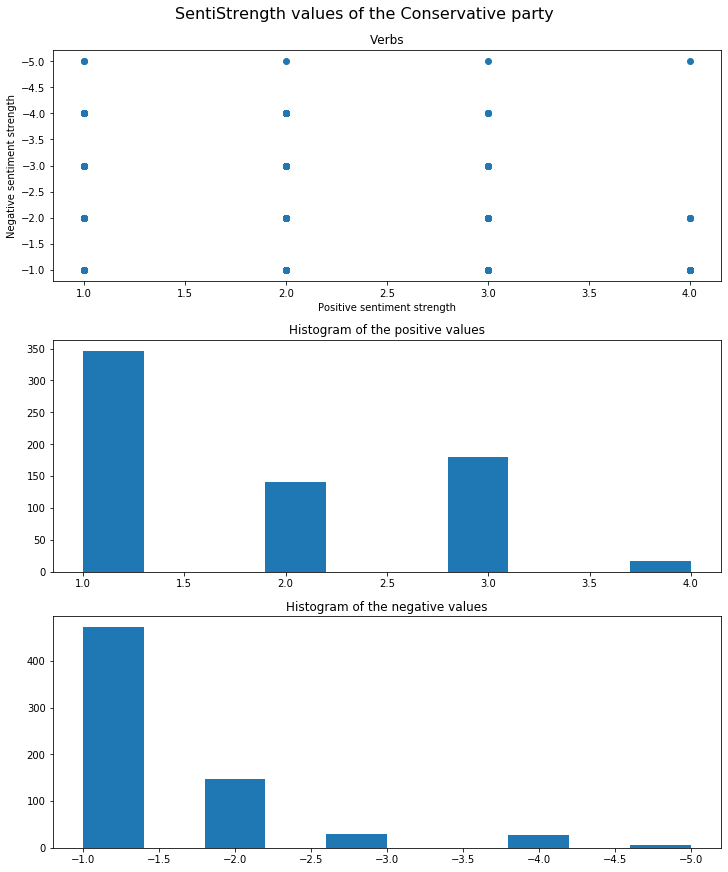

<Figure size 792x576 with 0 Axes>

1.5792031098153547
-1.8843537414965987
1 5
-1 -5


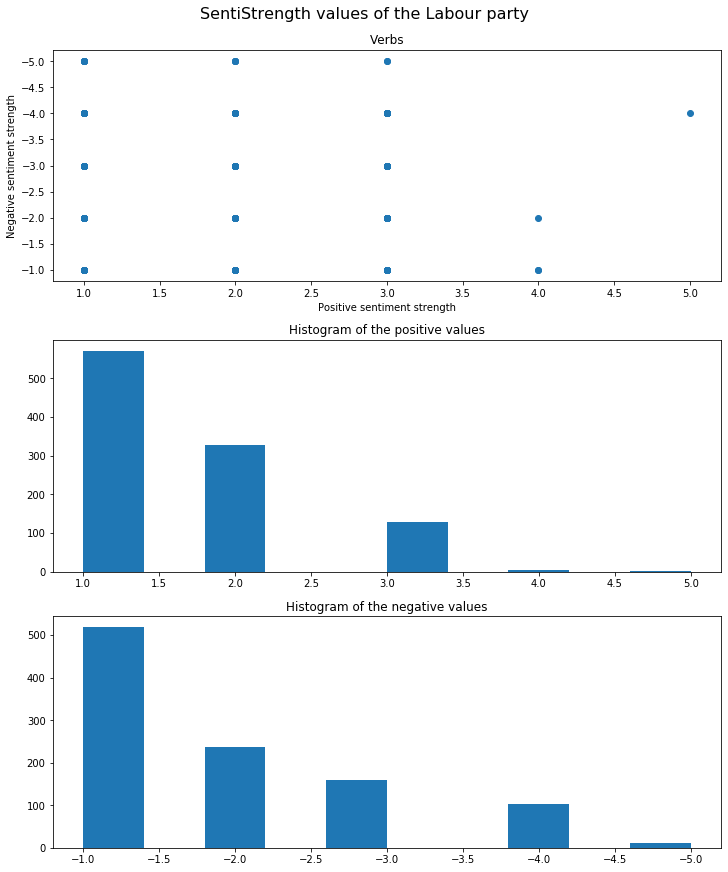

<Figure size 792x576 with 0 Axes>

1029


In [21]:
asd = listSenti(conssenti)
asd2 = listSenti(laboursenti)
#print(vc, vc2)
#print(sum([pair in asd])/len(asd))
#pearson(asd,asd2)
plotSenti(asd,"SentiStrength values of the Conservative party")

plotSenti(asd2,"SentiStrength values of the Labour party")
#plotSenti(asd2,"juu")
#print(listSenti())
#print (scipy.stats.pearsonr(asd,asd2))
#print(new_y)
#print((asd[0]))
print(len(laboursenti))


In [22]:
#print(asd2)
pearson(asd,asd2)

Pearson correlation between the datasets
0.9156525091916212


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/Eedvard/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/Eedvard/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
def getBestToken(tokens,num):
    best=(0,100)
    for a in tokens:
        if(abs(num-a[1])<abs(num-best[1])):
            best=a
    return best[0]

def getPartOfSpeech(sentences,indexword):
    verbs = []
    adverbs = []
    adjectives = []
    for i in range(len(sentences)):
        tagged = nltk.pos_tag(sentences[i])
        vb = []
        rb = []
        jj = []
        for j in range(len(tagged)):
            word = tagged[j][0]
            tag = tagged[j][1]
            if(word==indexword):
                num=j
            elif(tag.startswith("VB")):
                vb.append((word,j))
            elif(tag.startswith("RB")):
                rb.append((word,j))
            elif(tag.startswith("JJ")):
                jj.append((word,j))
        bestvb=getBestToken(vb,num)
        if(bestvb!=0):
            verbs.append(bestvb)
        bestrb=getBestToken(rb,num)
        if(bestrb!=0):
            adverbs.append(bestrb)
        bestjj=getBestToken(jj,num)
        if(bestjj!=0):
            adjectives.append(bestjj)
    return verbs, adverbs, adjectives

In [25]:
verbs1, adverbs1, adjectives1 = getPartOfSpeech(tweets1,"brexit")
verbs2, adverbs2, adjectives2 = getPartOfSpeech(tweets2,"brexit")

In [26]:
freqverb1 = nltk.FreqDist((verbs1))
freqadv1 = nltk.FreqDist((adverbs1))
freqadj1 = nltk.FreqDist((adjectives1))

freqverb2 = nltk.FreqDist((verbs2))
freqadv2 = nltk.FreqDist((adverbs2))
freqadj2 = nltk.FreqDist((adjectives2))

In [27]:
#k=(freqadv.most_common(10))


In [28]:
def plotTuples(list1, list2, list3, title):
    fig, axs = plt.subplots(3, 1, constrained_layout=True,figsize=(10,12))
    plt.figure(figsize=(11,8))
    axs[0].set_title('Verbs')
    axs[0].bar(*zip(*list1))
    axs[1].set_title('Adverbs')
    axs[1].bar(*zip(*list2))
    axs[2].set_title('Adjectives')
    axs[2].bar(*zip(*list3))
    fig.suptitle(title, fontsize=16)
    #fig.savefig('labourwordnhs.png')

    plt.show()

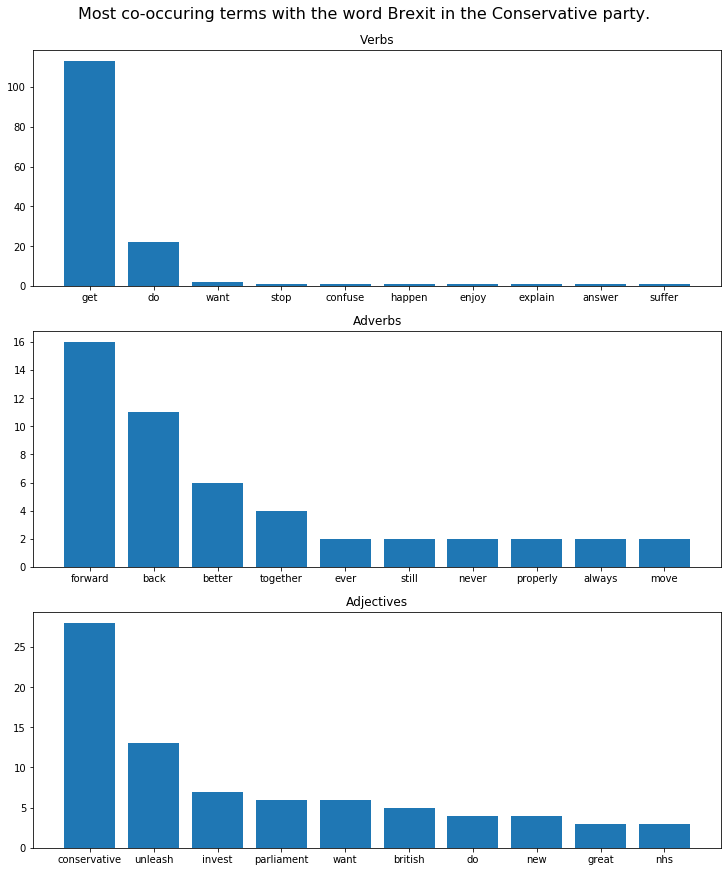

<Figure size 792x576 with 0 Axes>

In [29]:
title = "Most co-occuring terms with the word ""Brexit"" in the Conservative party."""
plotTuples(freqverb1.most_common(10),freqadv1.most_common(10),freqadj1.most_common(10),title)
#plt.savefig('conswords.png')
#plotTuples(freqadv1.most_common(10))
#plotTuples(freqadj1.most_common(10))

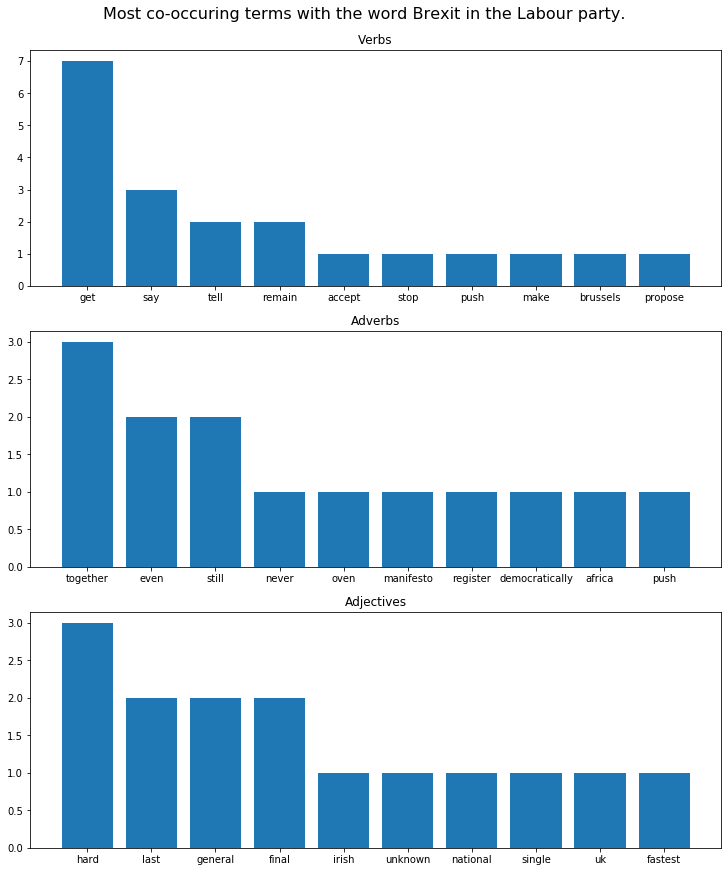

<Figure size 792x576 with 0 Axes>

In [30]:

title = "Most co-occuring terms with the word ""Brexit"" in the Labour party."""
plotTuples(freqverb2.most_common(10),freqadv2.most_common(10),freqadj2.most_common(10),title)
#plt.savefig('labourwords.png')


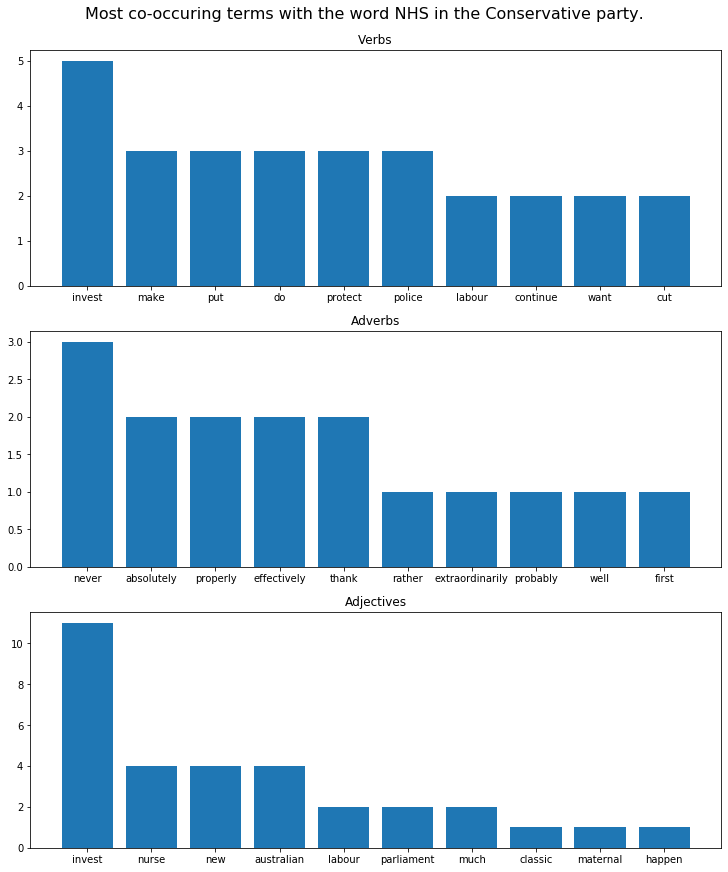

<Figure size 792x576 with 0 Axes>

In [31]:
verbs1, adverbs1, adjectives1 = getPartOfSpeech(tweetsnhs1,"nhs")
verbs2, adverbs2, adjectives2 = getPartOfSpeech(tweetsnhs2,"nhs")

freqverb1 = nltk.FreqDist((verbs1))
freqadv1 = nltk.FreqDist((adverbs1))
freqadj1 = nltk.FreqDist((adjectives1))

freqverb2 = nltk.FreqDist((verbs2))
freqadv2 = nltk.FreqDist((adverbs2))
freqadj2 = nltk.FreqDist((adjectives2))

title = "Most co-occuring terms with the word ""NHS"" in the Conservative party."""
plotTuples(freqverb1.most_common(10),freqadv1.most_common(10),freqadj1.most_common(10),title)



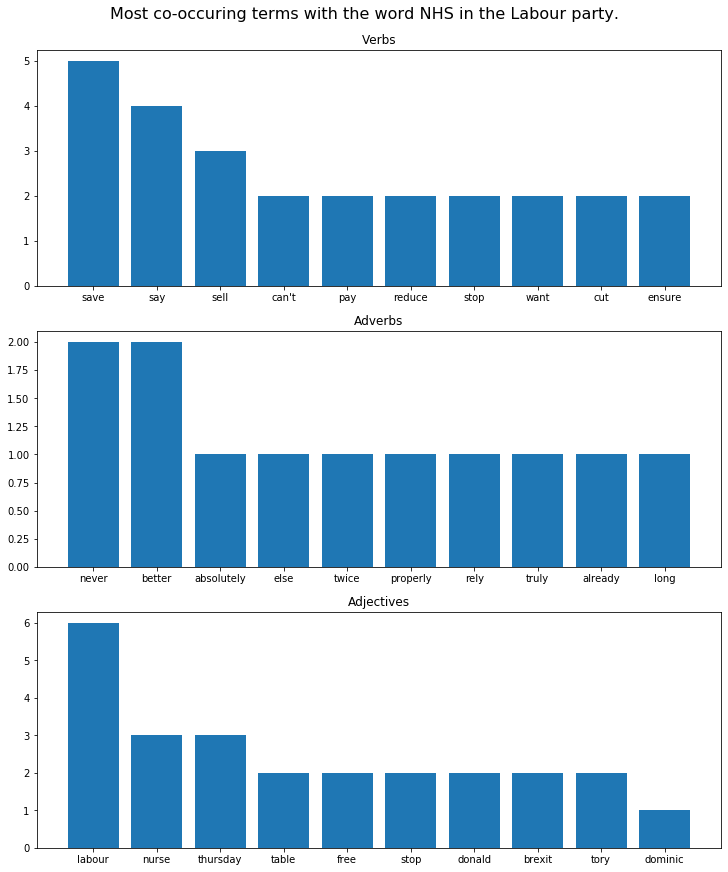

<Figure size 792x576 with 0 Axes>

In [32]:
title = "Most co-occuring terms with the word ""NHS"" in the Labour party."""
plotTuples(freqverb2.most_common(10),freqadv2.most_common(10),freqadj2.most_common(10),title)


In [33]:
print(1-nltk.jaccard_distance(set([x[0] for x in freqverb1.most_common(10)]), set([x[0] for x in freqverb2.most_common(10)])))
print(1-nltk.jaccard_distance(set([x[0] for x in freqadv1.most_common(10)]), set([x[0] for x in freqadv2.most_common(10)])))
print(1-nltk.jaccard_distance(set([x[0] for x in freqadj1.most_common(10)]), set([x[0] for x in freqadj2.most_common(10)])))
print(set([x[0] for x in freqadj1.most_common(10)]))

0.11111111111111116
0.17647058823529416
0.11111111111111116
{'australian', 'new', 'parliament', 'nurse', 'happen', 'labour', 'invest', 'classic', 'much', 'maternal'}


In [34]:
def countNegation(wordlist):
    operators = ["no", "not", "none", "never", "nobody", "nothing", "neither", "nobody", "no", "none", "nor", "nowhere","don't","can't","won't","doesn't", "aren't", "isn't",
                "didn't","haven't","hadn't","shouldn't","wouldn't","won't"]
    found = []
    for i in range(len(wordlist)):
        for operator in operators:
            if(operator in wordlist[i]):
                found.append(operator)
    return Counter(found).most_common()


In [35]:
conscount = countNegation(words)
labourcount = countNegation(words2)
print(conscount)
print(labourcount)

[('no', 222), ('not', 24), ('nor', 10), ('never', 10), ('nothing', 6), ('none', 2), ("can't", 2), ('nowhere', 1)]
[('no', 346), ('not', 40), ('nor', 25), ('never', 24), ("can't", 24), ('nothing', 12), ('none', 8), ('nobody', 4)]


In [36]:
consbrcount = countNegation(tweets1)
labourbrcount = countNegation(tweets2)

print(consbrcount)
print(labourbrcount)

[('never', 2), ('nothing', 2)]
[('never', 1), ("can't", 1), ('nothing', 1)]


In [37]:
print(len(tweets1)+len(tweets2))

197


In [38]:
consbrcount2 = countNegation(tweetsnhs1)
labourbrcount2 = countNegation(tweetsnhs2)
print(consbrcount2)
print(labourbrcount2)

[('never', 4), ('nothing', 1)]
[("can't", 4), ('never', 2), ('nothing', 1)]


In [39]:
source code files (jupyter notebook or common python files);
def countNegationNextTo(wordlist, word):
    operators = ["no", "not", "none", "never", "nobody", "nothing", "neither", "nobody", "no", "none", "nor", "nowhere","don't","can't","won't","doesn't", "aren't", "isn't",
                "didn't","haven't","hadn't","shouldn't","wouldn't","won't"]
    found = []
    for i in range(len(wordlist)):
        for operator in operators:
            if((operator in wordlist[i])):
                if((operator==wordlist[wordlist[i].index(word)-1])or(operator==wordlist[wordlist[i].index(word)+1])):
                    found.append(operator)
    return Counter(found).most_common()

SyntaxError: invalid syntax (<ipython-input-39-04955b669bbc>, line 1)

In [ ]:
consbrcount = countNegationNextTo(tweets1, "brexit")
labourbrcount = countNegationNextTo(tweets2, "brexit")
print(consbrcount)
print(labourbrcount)

In [ ]:
consbrcount2 = countNegationNextTo(tweetsnhs1, "nhs")
labourbrcount2 = countNegationNextTo(tweetsnhs2, "nhs")
print(consbrcount2)
print(labourbrcount2)